# Importing Necessary Libraries

In [30]:
# importing essential libraries
#importing libraries required

import findspark
findspark.init()
import pyspark # Call this only after findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import sum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import rank, col, unix_timestamp, from_unixtime, to_timestamp
from pyspark.sql import functions as F
import seaborn as sns
timeFmt = "yyyy-MM-dd"
from pyspark.sql.functions import *

# Loading and Exploring Dataset


In [2]:
#Reading Raw dataset
raw_data = spark.read.csv('crx.data', header = 'true', inferSchema='true')
type(raw_data)

pyspark.sql.dataframe.DataFrame

In [3]:

# Number of Rows and Columns in the raw dataset
print((raw_data.count(), len(raw_data.columns)))

(689, 16)


In [4]:
raw_data.printSchema()

root
 |-- b: string (nullable = true)
 |-- 30.83: string (nullable = true)
 |-- 02: double (nullable = true)
 |-- u: string (nullable = true)
 |-- g4: string (nullable = true)
 |-- w: string (nullable = true)
 |-- v: string (nullable = true)
 |-- 1.25: double (nullable = true)
 |-- t8: string (nullable = true)
 |-- t9: string (nullable = true)
 |-- 01: integer (nullable = true)
 |-- f: string (nullable = true)
 |-- g12: string (nullable = true)
 |-- 00202: string (nullable = true)
 |-- 014: integer (nullable = true)
 |-- +: string (nullable = true)



Initially, there were no attribute names in the dataset. In order to get a clear and easier picture of the project, we assigned names to each column value by checking its data and code book from the UCI repository. 

**Dataset source:** http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/

From the above link, we obtained the data and codebook from the respective files mentioned below- 

1.   Dataset (Raw data) : crx.data
2.   Dataset (CodeBook) : crx.names

* We also referred this Rpubs blog of Ryan Kuhn for reference : http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html



In [5]:
# Reading dataset as data
data = spark.read.csv('CC_data.csv', header = 'true', inferSchema='true')

type(data)

pyspark.sql.dataframe.DataFrame

In [6]:
# Number of Rows and Columns in the dataset
print((data.count(), len(data.columns)))

(690, 16)


In [7]:
data.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Debt: double (nullable = true)
 |-- Married: string (nullable = true)
 |-- BankCustomer: string (nullable = true)
 |-- EducationLevel: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- YearsEmployed: double (nullable = true)
 |-- PriorDefault: string (nullable = true)
 |-- Employed: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- DriversLicense: string (nullable = true)
 |-- Citizen: string (nullable = true)
 |-- ZipCode: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Approved: string (nullable = true)



In [8]:
data.columns

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'Income',
 'Approved']

This dataset may have some missing values or different data types so has to preprocess to prepare for machine learning ahed.

# Data Preprocessing and Cleaning

In [9]:
# Taking feature variables : here variables DriversLicense and ZipCode seem no use so not selected.
feature_data=data.select('Gender','Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity','YearsEmployed',\
 'PriorDefault', 'Employed', 'CreditScore', 'Citizen', 'Income', 'Approved')

In [10]:
feature_data

DataFrame[Gender: string, Age: string, Debt: double, Married: string, BankCustomer: string, EducationLevel: string, Ethnicity: string, YearsEmployed: double, PriorDefault: string, Employed: string, CreditScore: int, Citizen: string, Income: int, Approved: string]

In [11]:
feature_data.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Debt: double (nullable = true)
 |-- Married: string (nullable = true)
 |-- BankCustomer: string (nullable = true)
 |-- EducationLevel: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- YearsEmployed: double (nullable = true)
 |-- PriorDefault: string (nullable = true)
 |-- Employed: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Citizen: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Approved: string (nullable = true)



([<matplotlib.axis.XTick at 0x247135f9910>,
 [Text(0, 0, '+'), Text(0, 0, '-')])

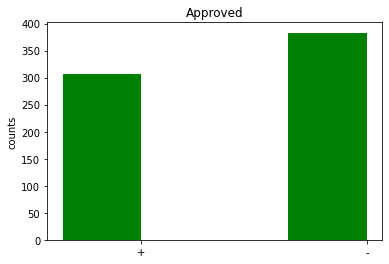

In [12]:
# Here Approved is reposnse variable and hence checking group by approval 
import numpy as np
responses = feature_data.groupBy('Approved').count().collect()
categories = [i[0] for i in responses]
counts = [i[1] for i in responses]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='g')
 
plt.ylabel('counts')
plt.title('Approved')
plt.xticks(ind + width/2., categories)

In [13]:
# Convert Age datatype from string to integer
from pyspark.sql.types import IntegerType
feature_data = feature_data.withColumn("Age", feature_data["Age"].cast(IntegerType()))


In [14]:
feature_data.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Debt: double (nullable = true)
 |-- Married: string (nullable = true)
 |-- BankCustomer: string (nullable = true)
 |-- EducationLevel: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- YearsEmployed: double (nullable = true)
 |-- PriorDefault: string (nullable = true)
 |-- Employed: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Citizen: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Approved: string (nullable = true)



In [50]:
numeric_features= [t[0] for t in data.dtypes if t[1] == 'int'or t[1] == 'double']
data.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Debt,690,4.7587246376811585,4.978163248528541,0.0,28.0
YearsEmployed,690,2.2234057971014476,3.346513359278135,0.0,28.5
CreditScore,690,2.4,4.862940034226994,0,67
Income,690,1017.3855072463768,5210.102598302688,0,100000


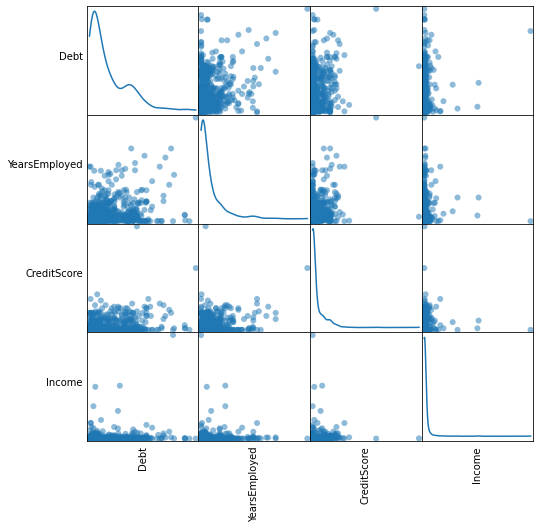

In [51]:
import pandas as pd
from pandas.plotting import scatter_matrix

numeric_data = data.select(numeric_features).toPandas()

axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8), marker='0', diagonal='kde');

# Rotate axis labels and remove axis ticks
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# HANDLING MISSING VALUES

In [17]:
#initial checking
feature_data.show()

+------+---+------+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+
|Gender|Age|  Debt|Married|BankCustomer|EducationLevel|Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|Citizen|Income|Approved|
+------+---+------+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+
|     b| 30|   0.0|      u|           g|             w|        v|         1.25|           t|       t|          1|      g|     0|       +|
|     a| 58|  4.46|      u|           g|             q|        h|         3.04|           t|       t|          6|      g|   560|       +|
|     a| 24|   0.5|      u|           g|             q|        h|          1.5|           t|       f|          0|      g|   824|       +|
|     b| 27|  1.54|      u|           g|             w|        v|         3.75|           t|       t|          5|      g|     3|       +|
|     b| 20| 5.625|      u|       

In [34]:
from pyspark.sql.functions import isnan, when, count, col
feature_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in feature_data.columns]).show()

+------+---+----+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+
|Gender|Age|Debt|Married|BankCustomer|EducationLevel|Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|Citizen|Income|Approved|
+------+---+----+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+
|     0| 12|   0|      0|           0|             0|        0|            0|           0|       0|          0|      0|     0|       0|
+------+---+----+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+



In [35]:
feature_data.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Debt: double (nullable = true)
 |-- Married: string (nullable = true)
 |-- BankCustomer: string (nullable = true)
 |-- EducationLevel: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- YearsEmployed: double (nullable = true)
 |-- PriorDefault: string (nullable = true)
 |-- Employed: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Citizen: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Approved: string (nullable = true)



In [37]:
def fill_with_mean(df, exclude=set()): 
    stats = df.agg(*(
     avg(c).alias(c) for c in df.columns if c not in exclude 
    )) 
    return df.na.fill(stats.first().asDict()) 

feature_data=fill_with_mean(feature_data, ["Gender", "Married", "Ethnicity","BankCustomer","EducationLevel","PriorDefault",\
                                          "Employed","Citizen","Approved"])

### checking dataframe

In [38]:
feature_data.show()

+------+---+------+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+
|Gender|Age|  Debt|Married|BankCustomer|EducationLevel|Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|Citizen|Income|Approved|
+------+---+------+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+
|     b| 30|   0.0|      u|           g|             w|        v|         1.25|           t|       t|          1|      g|     0|       +|
|     a| 58|  4.46|      u|           g|             q|        h|         3.04|           t|       t|          6|      g|   560|       +|
|     a| 24|   0.5|      u|           g|             q|        h|          1.5|           t|       f|          0|      g|   824|       +|
|     b| 27|  1.54|      u|           g|             w|        v|         3.75|           t|       t|          5|      g|     3|       +|
|     b| 20| 5.625|      u|       

### checking specific columns

In [39]:
feature_data.select('Age','Debt','YearsEmployed','CreditScore','Income').show()

+---+------+-------------+-----------+------+
|Age|  Debt|YearsEmployed|CreditScore|Income|
+---+------+-------------+-----------+------+
| 30|   0.0|         1.25|          1|     0|
| 58|  4.46|         3.04|          6|   560|
| 24|   0.5|          1.5|          0|   824|
| 27|  1.54|         3.75|          5|     3|
| 20| 5.625|         1.71|          0|     0|
| 32|   4.0|          2.5|          0|     0|
| 33|  1.04|          6.5|          0| 31285|
| 22|11.585|         0.04|          0|  1349|
| 54|   0.5|         3.96|          0|   314|
| 42| 4.915|        3.165|          0|  1442|
| 22|  0.83|        2.165|          0|     0|
| 29| 1.835|        4.335|          0|   200|
| 38|   6.0|          1.0|          0|     0|
| 48|  6.04|         0.04|          0|  2690|
| 45|  10.5|          5.0|          7|     0|
| 36| 4.415|         0.25|         10|     0|
| 28| 0.875|         0.96|          3|     0|
| 23| 5.875|         3.17|         10|   245|
| 21|  0.25|        0.665|        

In [40]:
feature_data.dtypes

[('Gender', 'string'),
 ('Age', 'int'),
 ('Debt', 'double'),
 ('Married', 'string'),
 ('BankCustomer', 'string'),
 ('EducationLevel', 'string'),
 ('Ethnicity', 'string'),
 ('YearsEmployed', 'double'),
 ('PriorDefault', 'string'),
 ('Employed', 'string'),
 ('CreditScore', 'int'),
 ('Citizen', 'string'),
 ('Income', 'int'),
 ('Approved', 'string')]

In [44]:
#Counting Response variable 'Approved' by grouping
feature_data.groupBy('Approved').count().show()

+--------+-----+
|Approved|count|
+--------+-----+
|       +|  307|
|       -|  383|
+--------+-----+



## **FEATURE ENGINEERING**

In [45]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ['Gender', 'Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','Citizen']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'Approved', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['Age','Debt','YearsEmployed','Income','CreditScore']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [47]:
from pyspark.ml import Pipeline
cols = feature_data.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(feature_data)
feature_data = pipelineModel.transform(feature_data)
selectedCols = ['label', 'features'] + cols
feature_data =feature_data.select(selectedCols)
feature_data.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Debt: double (nullable = false)
 |-- Married: string (nullable = true)
 |-- BankCustomer: string (nullable = true)
 |-- EducationLevel: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- YearsEmployed: double (nullable = false)
 |-- PriorDefault: string (nullable = true)
 |-- Employed: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Citizen: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Approved: string (nullable = true)



## **MACHINE LEARNING USING SPARK ML ON THE PIPELINED MODEL**

In [48]:
train, test = feature_data.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 496
Test Dataset Count: 194


## **LOGISTIC REGRESSION CLASSIFIER**

Parameters : maxIter = 10

In [49]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

# Make predictions on test data using the transform() method.

In [52]:
predictions = lrModel.transform(test)

In [53]:
selected = predictions.select("label","prediction", "probability")
selected.show(20)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.51529946280474...|
|  0.0|       0.0|[0.98433195494441...|
|  0.0|       0.0|[0.98111914466831...|
|  0.0|       0.0|[0.97249778160124...|
|  0.0|       0.0|[0.98108865056166...|
|  0.0|       0.0|[0.97673447406735...|
|  0.0|       0.0|[0.94504229229576...|
|  0.0|       0.0|[0.96951595586128...|
|  0.0|       0.0|[0.94698634702972...|
|  0.0|       0.0|[0.94955909726587...|
|  0.0|       1.0|[0.24499487398879...|
|  0.0|       1.0|[0.22614953884802...|
|  0.0|       0.0|[0.97169433253970...|
|  0.0|       0.0|[0.98266814321995...|
|  0.0|       1.0|[0.23008325369991...|
|  0.0|       0.0|[0.81809537061133...|
|  0.0|       1.0|[0.21006586065053...|
|  0.0|       0.0|[0.98184681893566...|
|  0.0|       0.0|[0.98480404713327...|
|  0.0|       0.0|[0.98690201621376...|
+-----+----------+--------------------+
only showing top 20 rows



In [54]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC curve: ', evaluator.evaluate(predictions))

Test Area Under ROC curve:  0.8816419860627166


# **Confusion matrix for logistic regression model**

In [55]:
cm = predictions.select("label", "prediction")
cm.groupby('label').agg({'label': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|         112|
|  1.0|          82|
+-----+------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|              100|
|       1.0|               94|
+----------+-----------------+



In [56]:
def accuracy_m(model): 
    predictions = model.transform(test)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100)) 
accuracy_m(model = lrModel)

Model accuracy: 83.505%


# CROSS VALIDATION ON THE TEST SET FOR LOG REG MODEL

In [57]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

cvModel = cv.fit(train)
predictions2 = cvModel.transform(test)
print('Test Area Under ROC for k=5 CV :', evaluator.evaluate(predictions2))

Test Area Under ROC for k=5 CV : 0.8981925087108018


In [58]:
def accuracy_m(model): 
    predictions = model.transform(test)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy for logistic regression model on test data with k=5 CV: %.3f%%" % (acc * 100)) 
accuracy_m(model = cvModel)

Model accuracy for logistic regression model on test data with k=5 CV: 84.021%


# **DECISION TREE CLASSIFIER**

In [59]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('label', 'prediction', 'probability').show(5)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       1.0|[0.19305019305019...|
|  0.0|       0.0|[0.94420600858369...|
|  0.0|       0.0|[0.94420600858369...|
|  0.0|       0.0|[0.94420600858369...|
|  0.0|       0.0|[0.94420600858369...|
+-----+----------+--------------------+
only showing top 5 rows



In [60]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC curve for DT classifier : ', evaluator.evaluate(predictions))

Test Area Under ROC curve for DT classifier :  0.8325348432055749


# **Confusion matrix for Decision tree classifier model**

In [61]:
cm = predictions.select("label", "prediction")
cm.groupby('label').agg({'label': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|         112|
|  1.0|          82|
+-----+------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|               92|
|       1.0|              102|
+----------+-----------------+



In [62]:
def accuracy_m(model): 
    predictions = model.transform(test)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy for DT classifier: %.3f%%" % (acc * 100)) 
accuracy_m(model = dtModel)

Model accuracy for DT classifier: 82.474%


# **ENSEMBLE OF DECISION TREES : RANDOM FOREST CLASSIFIER**

In [63]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('label','prediction', 'probability').show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       1.0|[0.38651198006637...|
|  0.0|       0.0|[0.91815067665532...|
|  0.0|       0.0|[0.90262705112203...|
|  0.0|       0.0|[0.79096045921938...|
|  0.0|       0.0|[0.92451319711358...|
|  0.0|       0.0|[0.90482789297354...|
|  0.0|       0.0|[0.77892907839145...|
|  0.0|       0.0|[0.72662446367865...|
|  0.0|       0.0|[0.76521087639485...|
|  0.0|       0.0|[0.87628713770520...|
+-----+----------+--------------------+
only showing top 10 rows



In [64]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC curve for RF classifier : ', evaluator.evaluate(predictions))

Test Area Under ROC curve for RF classifier :  0.9151241289198598


# **Confusion matrix for random forest classifier model**

In [65]:
cm = predictions.select("label", "prediction")
cm.groupby('label').agg({'label': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|         112|
|  1.0|          82|
+-----+------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|               99|
|       1.0|               95|
+----------+-----------------+



In [66]:
def accuracy_m(model): 
    predictions = model.transform(test)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy for RF classifier: %.3f%%" % (acc * 100)) 
accuracy_m(model = rfModel)

Model accuracy for RF classifier: 84.021%


# EXTRACTING FEATURE IMPORTANCE FROM RANDOM FOREST CLASSIFIER

In [69]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [71]:
result = ExtractFeatureImp(rfModel.featureImportances, feature_data, "features").head(10)
result

,idx,name,score
36,31,PriorDefaultclassVec_t,0.438786
4,39,CreditScore,0.118015
3,38,Income,0.106397
2,37,YearsEmployed,0.081513
37,32,EmployedclassVec_f,0.044710
0,35,Age,0.036086
1,36,Debt,0.031889
8,3,MarriedclassVec_y,0.028392
30,25,EthnicityclassVec_ff,0.016085
18,13,EducationLevelclassVec_ff,0.010080


In [76]:
df=feature_data
df2 = rfModel.transform(df)

In [77]:
from pyspark.ml.feature import VectorSlicer
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import Row

varlist = ExtractFeatureImp(rfModel.featureImportances,df, "features")
varidx = [x for x in varlist['idx'][0:10]]
varidx
slicer = VectorSlicer(inputCol="features", outputCol="features2", indices=varidx)

df3 = slicer.transform(df2)

df3 = df3.drop('rawPrediction', 'probability', 'prediction')
rf2 = RandomForestClassifier(labelCol="label", featuresCol="features2", seed = 8464,
                            numTrees=10, cacheNodeIds = True, subsamplingRate = 0.7)
mod2 = rf2.fit(df3)
pred = mod2.transform(df3)

In [78]:
pred.show(2)

+-----+--------------------+------+---+----+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+--------------------+--------------------+--------------------+----------+
|label|            features|Gender|Age|Debt|Married|BankCustomer|EducationLevel|Ethnicity|YearsEmployed|PriorDefault|Employed|CreditScore|Citizen|Income|Approved|           features2|       rawPrediction|         probability|prediction|
+-----+--------------------+------+---+----+-------+------------+--------------+---------+-------------+------------+--------+-----------+-------+------+--------+--------------------+--------------------+--------------------+----------+
|  1.0|(40,[0,2,5,10,22,...|     b| 30| 0.0|      u|           g|             w|        v|         1.25|           t|       t|          1|      g|     0|       +|(10,[0,1,3,5],[1....|[2.27073847280242...|[0.22707384728024...|       1.0|
|  1.0|(40,[1,2,5,9,23,3...|     a| 58|4.46|      u|

# **GRADIENT BOOST TREE CLASSIFIER**

In [79]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('label','prediction', 'probability').show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       1.0|[0.20410224456997...|
|  0.0|       0.0|[0.93446173542760...|
|  0.0|       0.0|[0.93446173542760...|
|  0.0|       0.0|[0.91734245490929...|
|  0.0|       0.0|[0.91702720378284...|
|  0.0|       0.0|[0.93763266801187...|
|  0.0|       0.0|[0.90861207384237...|
|  0.0|       0.0|[0.91734245490929...|
|  0.0|       0.0|[0.93471546073715...|
|  0.0|       0.0|[0.93446173542760...|
+-----+----------+--------------------+
only showing top 10 rows



In [80]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC curve for GBT classifier : ', evaluator.evaluate(predictions))

Test Area Under ROC curve for GBT classifier :  0.8974303135888501


In [81]:
cm = predictions.select("label", "prediction")
cm.groupby('label').agg({'label': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|         112|
|  1.0|          82|
+-----+------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|              101|
|       1.0|               93|
+----------+-----------------+



In [82]:
def accuracy_m(model): 
    predictions = model.transform(test)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy for GBT classifier: %.3f%%" % (acc * 100)) 
accuracy_m(model = gbtModel)

Model accuracy for GBT classifier: 84.021%


# **FEATURE IMPORTANCE FROM THE TREE CLASSIFIERS**

In [83]:
rfModel.featureImportances # Add this for report
dtModel.featureImportances # Add this for report
gbtModel.featureImportances # Add this for report

SparseVector(40, {0: 0.0212, 2: 0.0391, 4: 0.0077, 8: 0.0237, 9: 0.033, 10: 0.0168, 11: 0.0043, 12: 0.004, 14: 0.0071, 15: 0.0111, 17: 0.0088, 18: 0.0012, 19: 0.0243, 20: 0.0047, 22: 0.0031, 24: 0.0224, 27: 0.0255, 31: 0.3585, 32: 0.0301, 33: 0.0079, 35: 0.1074, 36: 0.1251, 37: 0.043, 38: 0.0636, 39: 0.0065})

In [84]:
f_imp = dtModel.featureImportances


def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))


result1 = ExtractFeatureImp(dtModel.featureImportances,df, "features").head(4)
result1

,idx,name,score
36,31,PriorDefaultclassVec_t,0.969272
9,4,MarriedclassVec_?,0.027147
0,35,Age,0.003581
30,25,EthnicityclassVec_ff,0.000000


In [85]:
f_imp = gbtModel.featureImportances


def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))


result2 = ExtractFeatureImp(gbtModel.featureImportances,df, "features").head(10)
result2

,idx,name,score
36,31,PriorDefaultclassVec_t,0.358505
1,36,Debt,0.125102
0,35,Age,0.107389
3,38,Income,0.063571
2,37,YearsEmployed,0.042958
7,2,MarriedclassVec_u,0.039103
14,9,EducationLevelclassVec_q,0.033031
37,32,EmployedclassVec_f,0.030115
32,27,EthnicityclassVec_j,0.025450
24,19,EducationLevelclassVec_e,0.024327


In [86]:
f_imp = rfModel.featureImportances


def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))


result3 = ExtractFeatureImp(rfModel.featureImportances,df, "features").head(10)
result3

,idx,name,score
36,31,PriorDefaultclassVec_t,0.438786
4,39,CreditScore,0.118015
3,38,Income,0.106397
2,37,YearsEmployed,0.081513
37,32,EmployedclassVec_f,0.044710
0,35,Age,0.036086
1,36,Debt,0.031889
8,3,MarriedclassVec_y,0.028392
30,25,EthnicityclassVec_ff,0.016085
18,13,EducationLevelclassVec_ff,0.010080


In [87]:
merged_df = pd.concat([result1, result2, result3])

# FINAL LIST OF BEST FEATURES OBTAINED FROM ALL THE TREE CLASSIFIERS

In [88]:
merged_df.sort_values(by='score', ascending=False).head(10)

,idx,name,score
36,31,PriorDefaultclassVec_t,0.969272
36,31,PriorDefaultclassVec_t,0.438786
36,31,PriorDefaultclassVec_t,0.358505
1,36,Debt,0.125102
4,39,CreditScore,0.118015
0,35,Age,0.107389
3,38,Income,0.106397
2,37,YearsEmployed,0.081513
3,38,Income,0.063571
37,32,EmployedclassVec_f,0.044710
